<a href="https://colab.research.google.com/github/arallina/Laboratorio-DF/blob/main/Transformada_de_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformada de Fourier - Laboratorio 2 (F)
### Respuesta al impulso del par emisor-receptor de ultrasonido

Importo las librerías necesarias:

In [ ]:
import numpy as np # para vectores y operaciones
import matplotlib.pyplot as plt # para graficar

y seteo propiedades de los gráficos:

In [ ]:
plt.rcParams["figure.figsize"] = (11,6)
plt.rcParams.update({'font.size': 14})

Importo los datos. En su primera columna tienen al tiempo, en la segunda la respuesta del receptor, y en la tercera el impulso con el que se alimenta al emisor.

Archivo modelo:
https://drive.google.com/file/d/1bTtRYC-xA0WQlQDQbmnHXcKoxKmx81qN/view?usp=sharing

In [ ]:
data = np.loadtxt('F0000CH1.CSV', usecols=(3,4), encoding="latin-1", delimiter=',')# con skiprows quito la primera fila porque es el encabezado
tiempo = data[:,0] # les asigno nombres reconocibles
impulso = data[:,1]
respuesta = data[:,2]

FileNotFoundError: ignored

Grafico los datos que importé:

NameError: ignored

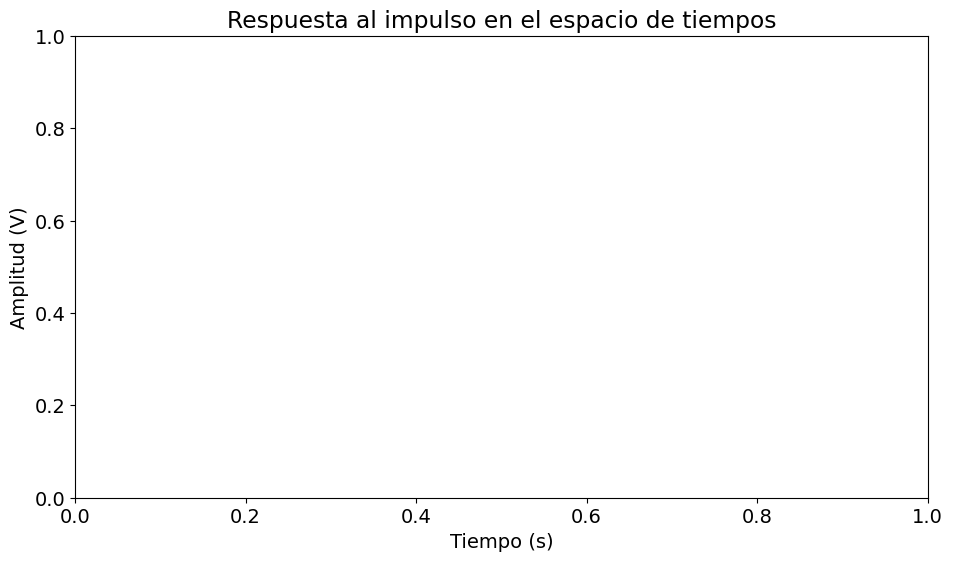

In [ ]:
plt.figure()
plt.title('Respuesta al impulso en el espacio de tiempos')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.plot(tiempo, impulso/1000, label='Impulso / 1000') # /1000 para visualizacion, porque es mucho más grande
plt.plot(tiempo, respuesta, label='Respuesta')
plt.legend()
plt.grid(True)
#plt.savefig("respuesta.pdf") # descomentar si se quiere almacenar la figura
plt.show()


Notemos que el pulso tiene una duración, a mitad de altura, de aproximadamente 1 milisegundo: ¿qué ancho aproximado se espera que tenga la transformada de Fourier a media altura?.

Veamos también dos cosas interesantes: al sistema le toma un tiempo responder al impulso, y parece hacerlo a una frecuencia determinada. Ambas cosas se ven mejor si uno hace *zoom* al principio del gŕafico.

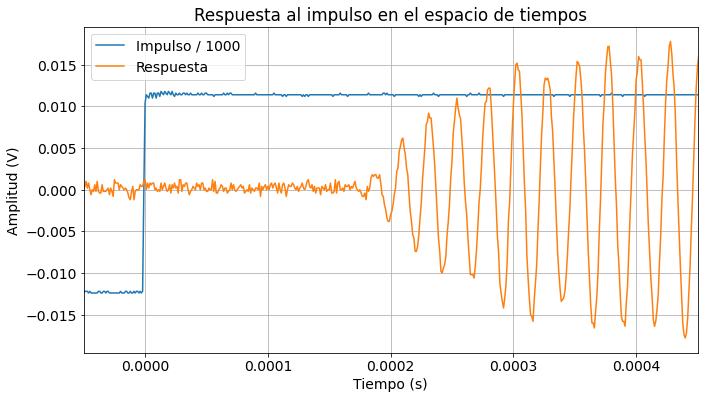

In [ ]:
intervalo = [-0.00005, 0.00045] # selecciono el intervalo temporal a mostrar

plt.figure()
plt.title('Respuesta al impulso en el espacio de tiempos')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.plot(tiempo, impulso/1000, label='Impulso / 1000') # recorto en la ventana de interés
plt.plot(tiempo, respuesta, label='Respuesta')
plt.xlim(intervalo)
plt.legend()
plt.grid(True)
#plt.savefig("respuesta_zoom.pdf") # descomentar si se quiere almacenar la figura
plt.show()

Efectivamente, el sistema demora unos ~0.18 ms en responder, y su respuesta parece tener un período de ~25 us. ¿A qué se deben estas dos cosas?

Veamos qué frecuencias componen la respuesta del sistema. Para eso, computo su transformada rápida de Fourier:

In [ ]:
transformada_0 = np.fft.fft(respuesta)

Pero esto, en principio, devuelve una transformada compleja y tampoco explicita cuáles son las frecuencias a la que está asociado cada valor. Así que procesemos eso:

In [ ]:
largo = len(tiempo) # miro la cantidad de elementos que tiene el vector de tiempos
d_tiempo = np.mean(np.diff(tiempo)) # miro los diferenciales de tiempo entre mediciones
frecuencia = np.fft.fftfreq(largo,d_tiempo) # crea el vector de frecuencias
transformada = np.abs(transformada_0) # le tomo el valor absoluto a la transformada,
# para este análisis en particular no son de interés las fases relativas entre componentes.

Y además tiene las frecuencias duplicadas, debido a cómo es el algoritmo de FFT. Así que miremos solo la primera mitad de los datos:

In [ ]:
frecuencia = frecuencia[np.arange(largo//2)]
transformada = transformada[np.arange(largo//2)]

# descomentar abajo para almacenar el archivo
# np.savetxt('transformada.txt', np.transpose([frecuencia,transformada]), delimiter='\t', header='Frecuencia (Hz) \t Transformada')

Ahora sí, graficamos la transformada:

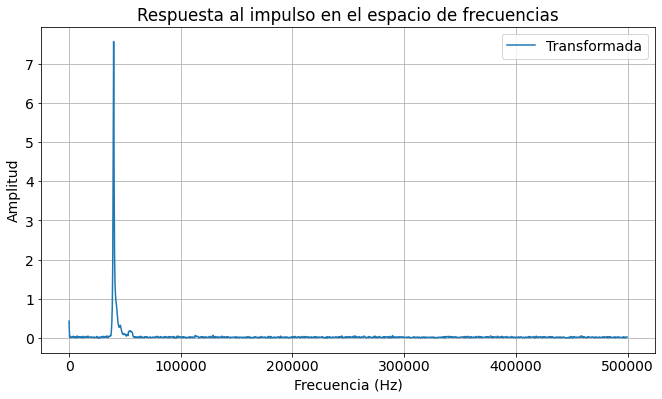

In [ ]:
plt.figure()
plt.title('Respuesta al impulso en el espacio de frecuencias')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.plot(frecuencia, transformada, label='Transformada')
plt.legend()
plt.grid(True)
#plt.savefig("transformada.pdf") # descomentar si se quiere almacenar la figura
plt.show()

# Nueva sección

Que ya vemos que tiene un pico marcado. Veamos para qué frecuencia:

In [ ]:
index_pico = np.argmax(transformada[1:]) # me da la ubicación del máximo y descarto el primer elemento porque es la componente de tensión continua.
index_pico = index_pico + 1 # al descartar el primero se me corre todo un lugar hacia la izquierda.
pico = frecuencia[index_pico] # vemos a qué frecuencia corresponde.
error = (frecuencia[index_pico+1]-frecuencia[index_pico-1])/4 # tomo como error la mitad de distancia hasta el siguiente punto.
print('Máximo encontrado en (' + str(round(pico)) +  u' \u00B1 ' + str(round(error)) + ') Hz')

Máximo encontrado en (39887 ± 201) Hz


Y hagamos zoom para ver mejor la zona interesante del gráfico:

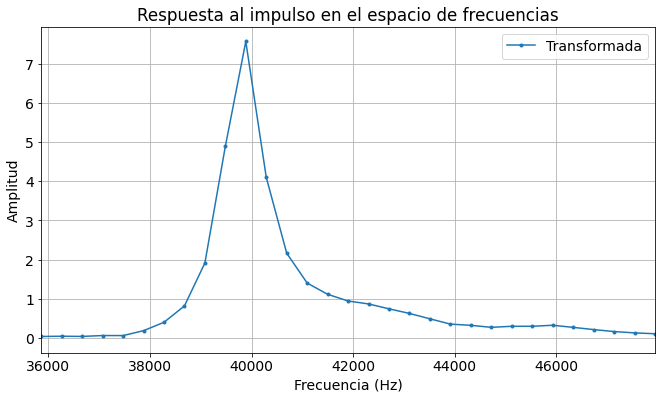

In [ ]:
intervalo_f = [pico-20*error,pico+40*error] # selecciono los puntos que quiero mostrar

plt.figure()
plt.title('Respuesta al impulso en el espacio de frecuencias')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.plot(frecuencia, transformada, '.-', label='Transformada')
#plt.yscale('log')
plt.xlim(intervalo_f)
plt.legend()
plt.grid(True)
#plt.savefig("transformada_zoom.pdf") # descomentar si se quiere almacenar la figura
plt.show()

¡Recuperamos la curva de resonancia que medimos previamente!

Pero entonces: ¿por qué la respuesta al impulso del sistema contiene esta información y por qué la recuperamos haciendo la transformada?